### Dataset Load

In [1]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
!pip install pycocotools

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975 (from 1)
Receiving objects: 100% (975/975), 11.72 MiB | 9.49 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
/usr/local/lib/python3.10/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build/temp.linux-x86_64-cpython-310/../common
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror

In [2]:
# coco - val2017 image and caption download
!mkdir -p coco_dataset
!wget -c http://images.cocodataset.org/zips/val2017.zip -P coco_dataset/
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco_dataset/

!unzip coco_dataset/val2017.zip -d coco_dataset/
!unzip coco_dataset/annotations_trainval2017.zip -d coco_dataset/


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: coco_dataset/val2017/000000365745.jpg  
 extracting: coco_dataset/val2017/000000320425.jpg  
 extracting: coco_dataset/val2017/000000481404.jpg  
 extracting: coco_dataset/val2017/000000314294.jpg  
 extracting: coco_dataset/val2017/000000335328.jpg  
 extracting: coco_dataset/val2017/000000513688.jpg  
 extracting: coco_dataset/val2017/000000158548.jpg  
 extracting: coco_dataset/val2017/000000132116.jpg  
 extracting: coco_dataset/val2017/000000415238.jpg  
 extracting: coco_dataset/val2017/000000321333.jpg  
 extracting: coco_dataset/val2017/000000081738.jpg  
 extracting: coco_dataset/val2017/000000577584.jpg  
 extracting: coco_dataset/val2017/000000346905.jpg  
 extracting: coco_dataset/val2017/000000433980.jpg  
 extracting: coco_dataset/val2017/000000228144.jpg  
 extracting: coco_dataset/val2017/000000041872.jpg  
 extracting: coco_dataset/val2017/000000117492.jpg  
 extracting: coco_dataset/val2017/000000368900.jpg  
 extractin

In [3]:
from pycocotools.coco import COCO
import os
import json

# set data path
coco_images_dir = "./coco_dataset/val2017"
coco_annotations_path = "./coco_dataset/annotations/captions_val2017.json"

# load COCO caption
coco = COCO(coco_annotations_path)

# make negative caption
annotations = []
for ann in coco.loadAnns(coco.getAnnIds()):
    positive_caption = ann['caption']
    negative_caption = f"This is not {positive_caption.lower()}"
    annotations.append({
        "image_id": ann['image_id'],
        "positive_caption": positive_caption,
        "negative_caption": negative_caption
    })

# 결과 JSON 저장
output_path = "./coco_dataset/captions_val2017_with_negatives.json"
with open(output_path, 'w') as f:
    json.dump(annotations, f)

print(f"Updated captions saved to {output_path}")


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Updated captions saved to ./coco_dataset/captions_val2017_with_negatives.json


In [4]:
# check size of dataset
!ls coco_dataset/val2017 | wc -l

# get sample image
!ls coco_dataset/val2017 | head -n 5


5000
000000000139.jpg
000000000285.jpg
000000000632.jpg
000000000724.jpg
000000000776.jpg


In [5]:
import json

# load negative caption file
with open('./coco_dataset/captions_val2017_with_negatives.json', 'r') as f:
    annotations = json.load(f)

# print sample data
for ann in annotations[:5]:
    print(f"Image ID: {ann['image_id']}")
    print(f"Positive Caption: {ann['positive_caption']}")
    print(f"Negative Caption: {ann['negative_caption']}")
    print("-" * 50)


Image ID: 179765
Positive Caption: A black Honda motorcycle parked in front of a garage.
Negative Caption: This is not a black honda motorcycle parked in front of a garage.
--------------------------------------------------
Image ID: 179765
Positive Caption: A Honda motorcycle parked in a grass driveway
Negative Caption: This is not a honda motorcycle parked in a grass driveway
--------------------------------------------------
Image ID: 190236
Positive Caption: An office cubicle with four different types of computers.
Negative Caption: This is not an office cubicle with four different types of computers.
--------------------------------------------------
Image ID: 331352
Positive Caption: A small closed toilet in a cramped space.
Negative Caption: This is not a small closed toilet in a cramped space.
--------------------------------------------------
Image ID: 517069
Positive Caption: Two women waiting at a bench next to a street.
Negative Caption: This is not two women waiting at a b

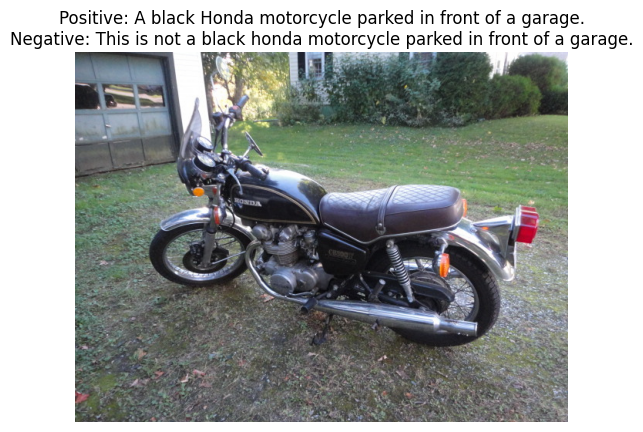

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# check sample image and caption
sample = annotations[0]
image_id = sample['image_id']
image_path = os.path.join('./coco_dataset/val2017', f"{str(image_id).zfill(12)}.jpg")

# load image and visualize
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Positive: {sample['positive_caption']}\nNegative: {sample['negative_caption']}")
plt.axis('off')
plt.show()


### CLIP model

In [9]:
#install CLIP
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-u71k7z09
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-u71k7z09
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


Processing backbone: ViT-B/32


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 74.3MiB/s]
  0%|          | 0/25014 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/content/cocoapi/PythonAPI/coco_dataset/images/val2017/000000179765.jpg'

In [14]:
import torch
import clip
from PIL import Image
from tqdm import tqdm
import pandas as pd

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/32"  # 이 스크립트는 ViT-B/32 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

    # 벡터 정규화
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # 유사도 계산
    positive_similarity = (image_features @ text_features[0].unsqueeze(0).T).item()
    negative_similarity = (image_features @ text_features[1].unsqueeze(0).T).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-B/32


100%|██████████| 25014/25014 [11:52<00:00, 35.12it/s]

Results saved to clip_similarity_results_ViT-B_32.json


In [15]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-B/16"  # 이 스크립트는 ViT-B/16 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

    # 벡터 정규화
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # 유사도 계산
    positive_similarity = (image_features @ text_features[0].unsqueeze(0).T).item()
    negative_similarity = (image_features @ text_features[1].unsqueeze(0).T).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-B/16


100%|███████████████████████████████████████| 335M/335M [00:26<00:00, 13.3MiB/s]
100%|██████████| 25014/25014 [12:01<00:00, 34.66it/s]


Results saved to clip_similarity_results_ViT-B_16.json


In [16]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "RN50x16"  # 이 스크립트는 RN50x16 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

    # 벡터 정규화
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # 유사도 계산
    positive_similarity = (image_features @ text_features[0].unsqueeze(0).T).item()
    negative_similarity = (image_features @ text_features[1].unsqueeze(0).T).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: RN50x16


100%|███████████████████████████████████████| 630M/630M [00:12<00:00, 51.2MiB/s]
100%|██████████| 25014/25014 [17:06<00:00, 24.37it/s]


Results saved to clip_similarity_results_RN50x16.json


In [17]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-L/14"  # 이 스크립트는 ViT-L/14 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

    # 벡터 정규화
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # 유사도 계산
    positive_similarity = (image_features @ text_features[0].unsqueeze(0).T).item()
    negative_similarity = (image_features @ text_features[1].unsqueeze(0).T).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-L/14


100%|███████████████████████████████████████| 890M/890M [00:14<00:00, 63.1MiB/s]
100%|██████████| 25014/25014 [14:48<00:00, 28.16it/s]

Results saved to clip_similarity_results_ViT-L_14.json


In [19]:
# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
backbone = "ViT-L/14@336px"  # 이 스크립트는 ViT-L/14@336px 백본 사용

# JSON 파일 경로
json_path = './coco_dataset/captions_val2017_with_negatives.json'
image_folder = './coco_dataset/val2017/'  # 이미지 디렉토리

# JSON 데이터 로드
with open(json_path, 'r') as f:
    annotations = json.load(f)

# 모델 및 전처리기 로드
print(f"Processing backbone: {backbone}")
model, preprocess = clip.load(backbone, device=device)

# 결과 저장
similarities = []
for ann in tqdm(annotations, total=len(annotations)):
    # 이미지 경로 생성
    image_path = os.path.join(image_folder, f"{int(ann['image_id']):012d}.jpg")

    # 파일 확인
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        continue

    # 이미지 로드 및 전처리
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)

    # 텍스트 준비
    positive_caption = ann['positive_caption']
    negative_caption = ann['negative_caption']
    text_tokens = clip.tokenize([positive_caption, negative_caption]).to(device)

    with torch.no_grad():
        # CLIP 인코딩
        image_features = model.encode_image(image)
        text_features = model.encode_text(text_tokens)

    # 벡터 정규화
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # 유사도 계산
    positive_similarity = (image_features @ text_features[0].unsqueeze(0).T).item()
    negative_similarity = (image_features @ text_features[1].unsqueeze(0).T).item()

    similarities.append({
        "image_id": ann["image_id"],
        "positive_similarity": positive_similarity,
        "negative_similarity": negative_similarity
    })

# 결과 저장
df = pd.DataFrame(similarities)
output_path = f"clip_similarity_results_{backbone.replace('/', '_')}.json"
df.to_json(output_path, orient='records', indent=4)
print(f"Results saved to {output_path}")


Processing backbone: ViT-L/14@336px


100%|███████████████████████████████████████| 891M/891M [00:13<00:00, 70.3MiB/s]
100%|██████████| 25014/25014 [17:41<00:00, 23.55it/s]


Results saved to clip_similarity_results_ViT-L_14@336px.json
